In [1]:
# import Required Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Importig Dataset
lr_ds=pd.read_csv('Input_File_Path')

In [3]:
#Understanding the Dataset
lr_ds.head()
lr_ds.shape
lr_ds.describe()
lr_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
# Getting the Car Company Name from CarName Field. Dropping Columns Carid, CarName
lr_ds_car = lr_ds["CarName"].str.split(" ", n = 1, expand = True)
lr_ds["Company_Name"]=lr_ds_car[0]
lr_ds=lr_ds.drop(["car_ID","CarName"],axis=1)
lr_ds.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


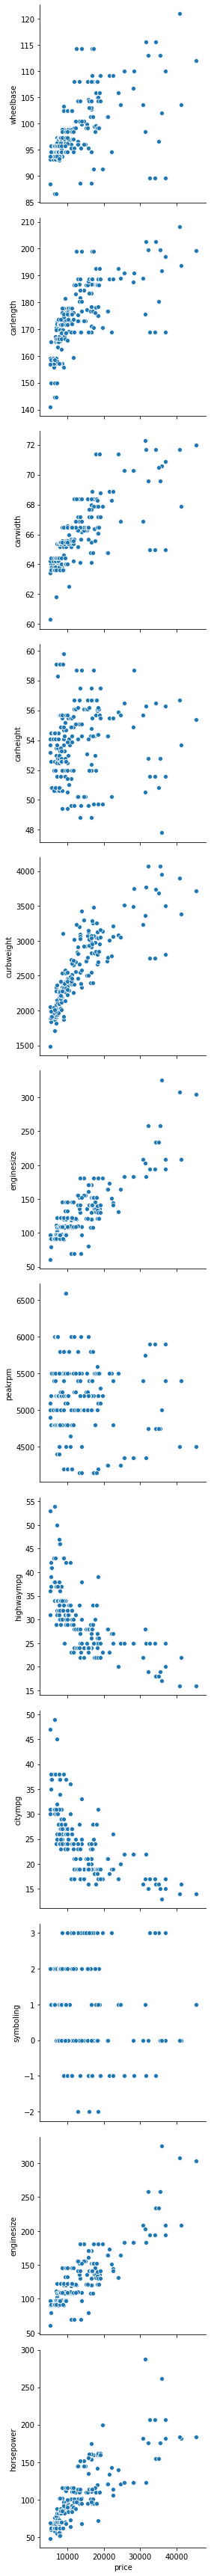

In [5]:
#Visualize the Datset, for Numeric Variables
sns.pairplot(lr_ds,y_vars=["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","peakrpm","highwaympg","citympg","symboling","enginesize","horsepower"],x_vars='price',size=4, aspect=1, kind='scatter')


In [6]:
#Preparing Data for Columns Fuel Type,Aspiration,doornumber & Engine Location, Since they only have 2 possible values

# Fueltype Column
lr_ds.fueltype.value_counts()
lr_ds['fueltype']=lr_ds['fueltype'].map({'gas':1,'diesel':0})
lr_ds.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name
0,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [7]:
#Aspiration Column
lr_ds.aspiration.value_counts()
lr_ds['aspiration']=lr_ds['aspiration'].map({'std':1,'turbo':0})
lr_ds.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name
0,3,1,1,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [8]:
#Engine Location Column
lr_ds.enginelocation.value_counts()
lr_ds['enginelocation']=lr_ds['enginelocation'].map({'front':1,'rear':0})
lr_ds.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name
0,3,1,1,two,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,two,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,two,hatchback,rwd,1,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,four,sedan,fwd,1,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,four,sedan,4wd,1,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [9]:
# Doornumber Column
lr_ds.doornumber.value_counts()
lr_ds['doornumber']=lr_ds['doornumber'].map({'four':1,'two':0})
lr_ds.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name
0,3,1,1,0,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,1,0,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,1,0,hatchback,rwd,1,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,1,1,sedan,fwd,1,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,4wd,1,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [10]:
#Creating Dummy Variables for other Categorical Columns

#Carbody 
carbody=pd.get_dummies(lr_ds['carbody'],drop_first=True)
lr_ds=pd.concat([lr_ds,carbody],axis=1)
lr_ds=lr_ds.drop('carbody',axis=1)
lr_ds.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,horsepower,peakrpm,citympg,highwaympg,price,Company_Name,hardtop,hatchback,sedan,wagon
0,3,1,1,0,rwd,1,88.6,168.8,64.1,48.8,...,111,5000,21,27,13495.0,alfa-romero,0,0,0,0
1,3,1,1,0,rwd,1,88.6,168.8,64.1,48.8,...,111,5000,21,27,16500.0,alfa-romero,0,0,0,0
2,1,1,1,0,rwd,1,94.5,171.2,65.5,52.4,...,154,5000,19,26,16500.0,alfa-romero,0,1,0,0
3,2,1,1,1,fwd,1,99.8,176.6,66.2,54.3,...,102,5500,24,30,13950.0,audi,0,0,1,0
4,2,1,1,1,4wd,1,99.4,176.6,66.4,54.3,...,115,5500,18,22,17450.0,audi,0,0,1,0


In [11]:
# Car Company Name
CarName=pd.get_dummies(lr_ds['Company_Name'],drop_first=True)
lr_ds=pd.concat([lr_ds,CarName],axis=1)
lr_ds=lr_ds.drop('Company_Name',axis=1)
lr_ds.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,3,1,1,0,rwd,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,0,rwd,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,rwd,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,1,fwd,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,1,4wd,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Drivewheel
drivewheel=pd.get_dummies(lr_ds['drivewheel'],drop_first=True)
lr_ds=pd.concat([lr_ds,drivewheel],axis=1)
lr_ds=lr_ds.drop('drivewheel',axis=1)
lr_ds.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,fwd,rwd
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,1,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Engine Type
enginetype=pd.get_dummies(lr_ds['enginetype'],drop_first=True)
lr_ds=pd.concat([lr_ds,enginetype],axis=1)
lr_ds=lr_ds.drop('enginetype',axis=1)
lr_ds.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,volvo,vw,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,0,1,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,1,0,0,0,1,0,0,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,1,0,0,0


In [14]:
#Cylinder Number
cylindernumber=pd.get_dummies(lr_ds['cylindernumber'],drop_first=True)
lr_ds=pd.concat([lr_ds,cylindernumber],axis=1)
lr_ds=lr_ds.drop('cylindernumber',axis=1)
lr_ds.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,0,1,0,0,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,0,1,0,0,0,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,1,0,0,0,0,0


In [15]:
#Fuel System
fuelsystem=pd.get_dummies(lr_ds['fuelsystem'],drop_first=True)
lr_ds=pd.concat([lr_ds,fuelsystem],axis=1)
lr_ds=lr_ds.drop('fuelsystem',axis=1)
lr_ds.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [16]:
#Splitting Train & Testing Dataset

df_train,df_test=train_test_split(lr_ds,train_size=0.7,random_state=100)

In [17]:
# Scaling the Data

scaler=MinMaxScaler()


var_col_list=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio'
              ,'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']



df_train[var_col_list]=scaler.fit_transform(df_train[var_col_list])
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,1,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,1,0,0,0,0,0,0
125,3,1,1,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,0,0,0,0,1,0,0
166,1,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,1,0,0
199,-1,1,0,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Splitting X & Y Train Data Set

Y_Train=df_train.pop('price')
X_Train=df_train

In [19]:
# Using RFE, for 20 Columns, to determine the top 20 co-efficients

lm = LinearRegression()
lm.fit(X_Train, Y_Train)

rfe = RFE(lm, 20)             
rfe = rfe.fit(X_Train, Y_Train)

In [20]:
#View co-efficients ranking
list(zip(X_Train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 47),
 ('fueltype', False, 15),
 ('aspiration', False, 4),
 ('doornumber', False, 36),
 ('enginelocation', True, 1),
 ('wheelbase', False, 7),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 16),
 ('horsepower', False, 5),
 ('peakrpm', False, 6),
 ('citympg', False, 27),
 ('highwaympg', False, 17),
 ('hardtop', False, 21),
 ('hatchback', False, 20),
 ('sedan', False, 22),
 ('wagon', False, 23),
 ('alfa-romero', False, 33),
 ('audi', False, 25),
 ('bmw', True, 1),
 ('buick', False, 26),
 ('chevrolet', False, 13),
 ('dodge', False, 10),
 ('honda', False, 12),
 ('isuzu', False, 35),
 ('jaguar', False, 18),
 ('maxda', False, 34),
 ('mazda', False, 49),
 ('mercury', False, 44),
 ('mitsubishi', False, 3),
 ('nissan', False, 48),
 ('peugeot', True, 1),
 ('plymouth', False, 9),
 ('porcshce', False, 45),
 ('porsche', Tr

In [21]:
#List of variables selected bby RFE 
rfe_sel_lst=X_Train.columns[rfe.support_]
rfe_sel_lst

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'bmw', 'peugeot', 'porsche', 'saab', 'subaru', 'volvo', 'l',
       'ohcf', 'rotor', 'five', 'four', 'three', 'twelve', 'two'],
      dtype='object')

In [22]:
#List of variables not selected by RFE 
rfe_nsel_lst=X_Train.columns[~rfe.support_]
rfe_nsel_lst

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'alfa-romero', 'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'plymouth', 'porcshce', 'renault', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'fwd', 'rwd', 'dohcv', 'ohc', 'ohcv', 'six', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [23]:
# Creting Dataset, based on RFE Selections
x_train_rfe=X_Train[rfe_sel_lst]
#Adding Constant Variable for Statsmodels
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.19e-71
Time:                        22:50:52   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0930      0.046     -2.

In [24]:
# Determining VIF 
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,two,inf
7,peugeot,inf
17,three,inf
14,rotor,inf
12,l,inf
0,enginelocation,79.10
3,enginesize,37.13
10,subaru,32.00
13,ohcf,25.13
16,four,15.81


In [25]:
#Dropping 'two' column, since it has inf vif & re-calculating model

x_train_rfe=x_train_rfe.drop('two',axis=1)


In [26]:
#Adding Constant Variable for Statsmodels
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.19e-71
Time:                        22:50:52   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0930      0.046     -2.

In [27]:
# Determining VIF 
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,three,inf
7,peugeot,inf
12,l,inf
0,enginelocation,79.10
3,enginesize,37.13
10,subaru,32.00
13,ohcf,25.13
16,four,15.81
2,curbweight,12.50
4,boreratio,10.03


In [28]:
# Dropping 'three', since it is inf
x_train_rfe=x_train_rfe.drop('three',axis=1)

In [29]:
# Determining VIF 
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,79.10
3,enginesize,37.13
10,subaru,32.00
13,ohcf,25.13
7,peugeot,17.20
12,l,16.06
16,four,15.81
2,curbweight,12.50
4,boreratio,10.03
14,rotor,7.29


In [30]:
# Re-calculating significance, after dropping 2 columns
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.19e-71
Time:                        22:50:52   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0930      0.046     -2.

In [31]:
#Re-Calculating VIF
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,79.10
3,enginesize,37.13
10,subaru,32.00
13,ohcf,25.13
7,peugeot,17.20
12,l,16.06
16,four,15.81
2,curbweight,12.50
4,boreratio,10.03
14,rotor,7.29


In [32]:
# Dropping Column Subaru, since it has high p and high vif
x_train_rfe=x_train_rfe.drop('subaru',axis=1)

In [33]:
#Re-Calculating Model Factors
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.19e-71
Time:                        22:50:52   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0637      0.091     -0.

In [34]:
#Re-Calculating VIF
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,98.50
0,enginelocation,62.51
2,curbweight,59.33
4,boreratio,52.55
15,four,48.15
1,carwidth,44.81
5,stroke,34.47
7,peugeot,17.70
11,l,15.67
13,rotor,5.67


In [35]:
#Dropping Enginesize, since it has high VIF 
x_train_rfe=x_train_rfe.drop('enginesize',axis=1)

In [36]:
#Re-Calculating Model Factors
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     81.72
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.88e-58
Time:                        22:50:52   Log-Likelihood:                 190.80
No. Observations:                 143   AIC:                            -347.6
Df Residuals:                     126   BIC:                            -297.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3289      0.101      3.

In [37]:
#Re-Calculating VIF
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,57.28
1,carwidth,44.57
2,curbweight,44.20
3,boreratio,31.45
4,stroke,23.41
14,four,22.10
6,peugeot,16.66
10,l,13.11
11,ohcf,2.56
13,five,1.77


In [38]:
#Dropping saab, since it has high p value 
x_train_rfe=x_train_rfe.drop('saab',axis=1)

In [39]:
#Re-Calculating Model Factors
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     87.85
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.97e-59
Time:                        22:50:52   Log-Likelihood:                 190.80
No. Observations:                 143   AIC:                            -349.6
Df Residuals:                     127   BIC:                            -302.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3297      0.100      3.

In [40]:
#Re-Calculating VIF
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,56.72
1,carwidth,44.39
2,curbweight,43.78
3,boreratio,30.99
4,stroke,22.02
13,four,21.40
6,peugeot,16.17
9,l,12.98
10,ohcf,2.40
12,five,1.77


In [41]:
#Dropping five, since it has high p value 
x_train_rfe=x_train_rfe.drop('five',axis=1)

In [42]:
#Re-Calculating Model Factors
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     94.74
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.14e-60
Time:                        22:50:52   Log-Likelihood:                 190.72
No. Observations:                 143   AIC:                            -351.4
Df Residuals:                     128   BIC:                            -307.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3251      0.099      3.

In [43]:
#Re-Calculating VIF
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,55.87
2,curbweight,41.38
1,carwidth,40.08
3,boreratio,30.97
4,stroke,21.95
12,four,19.02
6,peugeot,16.10
9,l,12.90
10,ohcf,2.40
11,rotor,1.62


In [44]:
#Dropping five, since it has high p value 
x_train_rfe=x_train_rfe.drop('four',axis=1)

In [45]:
#Re-Calculating Model Factors
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     102.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.15e-61
Time:                        22:50:53   Log-Likelihood:                 190.67
No. Observations:                 143   AIC:                            -353.3
Df Residuals:                     129   BIC:                            -311.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3212      0.098      3.

In [46]:
#Re-Calculating VIF
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,35.68
2,curbweight,26.89
0,enginelocation,25.94
3,boreratio,21.59
4,stroke,21.08
6,peugeot,10.24
9,l,9.60
10,ohcf,2.37
7,porsche,1.40
8,volvo,1.31


In [47]:
#Dropping volvo, since it has high p value 
x_train_rfe=x_train_rfe.drop('volvo',axis=1)

In [48]:
#Re-Calculating Model Factors
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     112.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.12e-62
Time:                        22:50:53   Log-Likelihood:                 190.60
No. Observations:                 143   AIC:                            -355.2
Df Residuals:                     130   BIC:                            -316.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3149      0.096      3.

In [49]:
#Re-Calculating VIF
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,35.31
2,curbweight,26.87
0,enginelocation,25.94
3,boreratio,19.98
4,stroke,19.82
6,peugeot,10.07
8,l,9.59
9,ohcf,2.17
7,porsche,1.36
11,twelve,1.16


In [50]:
#Dropping rotor, since it has high p value 
x_train_rfe=x_train_rfe.drop('rotor',axis=1)

In [51]:
#Re-Calculating Model Factors
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.30e-63
Time:                        22:50:53   Log-Likelihood:                 189.68
No. Observations:                 143   AIC:                            -355.4
Df Residuals:                     131   BIC:                            -319.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3235      0.096      3.

In [52]:
#Re-Calculating VIF
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,35.25
2,curbweight,26.67
0,enginelocation,25.93
4,stroke,19.81
3,boreratio,19.70
6,peugeot,10.07
8,l,9.59
9,ohcf,2.14
7,porsche,1.35
10,twelve,1.16


In [53]:
#Dropping boreratrio, since it has high p value 
x_train_rfe=x_train_rfe.drop('boreratio',axis=1)

In [54]:
#Re-Calculating Model Factors
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     133.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.07e-64
Time:                        22:50:53   Log-Likelihood:                 188.94
No. Observations:                 143   AIC:                            -355.9
Df Residuals:                     132   BIC:                            -323.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3343      0.096      3.

In [55]:
#Re-Calculating VIF
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,35.13
2,curbweight,22.70
0,enginelocation,22.49
3,stroke,19.77
5,peugeot,10.00
7,l,9.58
8,ohcf,1.58
6,porsche,1.18
9,twelve,1.15
4,bmw,1.14


In [56]:
#Dropping stroke, since it has high p value 
x_train_rfe=x_train_rfe.drop('stroke',axis=1)

In [57]:
#Re-Calculating Model Factors
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     146.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.45e-64
Time:                        22:50:53   Log-Likelihood:                 187.92
No. Observations:                 143   AIC:                            -355.8
Df Residuals:                     133   BIC:                            -326.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2800      0.087      3.

In [58]:
#Re-Calculating VIF
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,34.97
2,curbweight,22.37
4,peugeot,9.98
6,l,9.58
0,enginelocation,9.10
5,porsche,1.17
3,bmw,1.12
7,ohcf,1.12
8,twelve,1.08


In [59]:
#Dropping carwidth, since it has high VIF value 
x_train_rfe=x_train_rfe.drop('carwidth',axis=1)

In [60]:
#Re-Calculating Model Factors
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     133.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.76e-60
Time:                        22:50:53   Log-Likelihood:                 173.99
No. Observations:                 143   AIC:                            -330.0
Df Residuals:                     134   BIC:                            -303.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2119      0.095      2.

In [61]:
#Re-Calculating VIF
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,peugeot,9.74
5,l,9.34
1,curbweight,6.09
0,enginelocation,5.35
6,ohcf,1.11
2,bmw,1.10
4,porsche,1.10
7,twelve,1.08


In [62]:
#Dropping carwidth, since it has high VIF value 
x_train_rfe=x_train_rfe.drop('l',axis=1)

In [63]:
#Re-Calculating Model Factors
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the Model, on above dataset
lm = sm.OLS(Y_Train,x_train_rfe).fit() 
#View Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.03e-60
Time:                        22:50:53   Log-Likelihood:                 172.17
No. Observations:                 143   AIC:                            -328.3
Df Residuals:                     135   BIC:                            -304.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2176      0.096      2.

In [64]:
#Re-Calculating VIF
X_train_new = x_train_rfe.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,5.92
0,enginelocation,5.16
3,peugeot,1.21
5,ohcf,1.11
2,bmw,1.10
4,porsche,1.10
6,twelve,1.07


Text(0.5, 0, 'Errors')

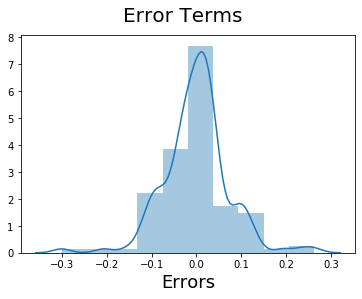

In [65]:
# Residual Analysis

Y_Train_prc = lm.predict(x_train_rfe)
%matplotlib inline
res_fig = plt.figure()
sns.distplot((Y_Train-Y_Train_prc),bins=10)
res_fig.suptitle('Error Terms', fontsize = 20)           
plt.xlabel('Errors', fontsize = 18)                        

In [66]:
# Predictions using Test Data, on selected columns
test_cols=['enginelocation','curbweight','bmw','peugeot','porsche','ohcf','twelve','price']
df_test[test_cols]=scaler.fit_transform(df_test[test_cols])
df_test[test_cols].head()

,enginelocation,curbweight,bmw,peugeot,porsche,ohcf,twelve,price
160,1.0,0.132148,0.0,0.0,0.0,0.0,0.0,0.058474
186,1.0,0.219125,0.0,0.0,0.0,0.0,0.0,0.077398
59,1.0,0.271985,0.0,0.0,0.0,0.0,0.0,0.086148
165,1.0,0.214320,0.0,0.0,0.0,0.0,0.0,0.097473
140,1.0,0.202307,0.0,0.0,0.0,1.0,0.0,0.055099


In [67]:
# Splitting X & Y Test set
Y_Test = df_test.pop('price')
X_Test = df_test

In [68]:
#Making Predictions
x_test_new=X_Test[X_train_new.columns]
x_test_new = sm.add_constant(x_test_new)
Y_Pred = lm.predict(x_test_new)

Text(0, 0.5, 'y_pred')

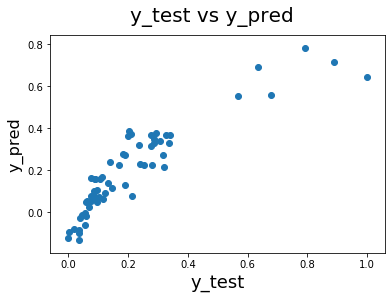

In [69]:
# Evaluating Model
mod_fig=plt.figure()
plt.scatter(Y_Test,Y_Pred)
mod_fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                        

In [70]:
#Caclulating RSquared Score

from sklearn.metrics import r2_score
r2_score(Y_Test, Y_Pred)

0.8058672104680391